<div style="text-align: right;">
<h4> <b>Author:</b> <a style="color:blue;">Sujith Kumar</a> </h4>
<h4> <b>Subject:</b> <a style="color:blue;">Telecom Churn Case Study</a> </h4>
<h4> <b>Batch:</b> <a style="color:blue;">April 2022</a> </h4>
</div>   

#### 
#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML

In [2]:
in_df = pd.read_csv('train.csv')

In [3]:
in_df.shape

(69999, 172)

In [4]:
in_df.head(5).append(in_df.tail(5))

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [5]:
# print all columns, describe the columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',300)
in_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

### Define a function to return stats of data frame in a dataframe

In [6]:
def colums_stats_func(df):
    return(pd.DataFrame({'Type':df.dtypes.astype(str),
                         'Unqiue Val':df.nunique().astype(int),
                         'Unique Percent' :round((df.nunique())/len(df)*100,2),
                         'Null Percent':round((df.isnull().sum()/len(df))*100,2),                         
                         'Min':df.min(),
                         '25%': df.quantile(q=.25),
                         '50%': df.quantile(q=.50),
                         '75%': df.quantile(q=.75),
                         '90%': df.quantile(q=.90),
                         '95%': df.quantile(q=.95),
                         '99%': df.quantile(q=.99),
                         'Max':df.max()
                        }
                       )
          )
colums_stats = colums_stats_func(in_df) 
colums_stats.sort_values(by='Unique Percent',ascending=True)

,Type,Unqiue Val,Unique Percent,Null Percent,Min,25%,50%,75%,90%,95%,99%,Max
last_date_of_month_7,object,1,0.00,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fb_user_8,float64,2,0.00,73.69,0.0,1.0000,1.000,1.0000,1.0000,1.0000,1.00000,1.0
std_og_t2c_mou_8,float64,1,0.00,5.29,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.0
std_og_t2c_mou_7,float64,1,0.00,3.84,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.0
std_og_t2c_mou_6,float64,1,0.00,3.95,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.0
last_date_of_month_6,object,1,0.00,0.00,6/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014
circle_id,int64,1,0.00,0.00,109,109.0000,109.000,109.0000,109.0000,109.0000,109.00000,109
churn_probability,int64,2,0.00,0.00,0,0.0000,0.000,0.0000,1.0000,1.0000,1.00000,1
last_date_of_month_8,object,1,0.00,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fb_user_7,float64,2,0.00,74.48,0.0,1.0000,1.000,1.0000,1.0000,1.0000,1.00000,1.0


#### As observed from above data - looking at min and max values, following columns are blank or 0 and can be dropped

In [7]:
droppable_cols= ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7']
droppable_cols.extend(['std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'])

In [8]:
in_df.drop(droppable_cols,axis=1,inplace=True)
print('Dropped Columns count from input dataset=',len(droppable_cols),' New shape',in_df.shape)

Dropped Columns count from input dataset= 11  New shape (69999, 161)


### Now identify the columns with more than 50% null values

In [9]:
colums_stats = colums_stats_func(in_df) 
colums_stats.sort_values(by='Null Percent',ascending=False)

,Type,Unqiue Val,Unique Percent,Null Percent,Min,25%,50%,75%,90%,95%,99%,Max
av_rech_amt_data_6,float64,792,1.13,74.90,1.0,82.0000,154.000,252.0000,353.3000,504.0000,910.00000,5920.0
fb_user_6,float64,2,0.00,74.90,0.0,1.0000,1.000,1.0000,1.0000,1.0000,1.00000,1.0
night_pck_user_6,float64,2,0.00,74.90,0.0,0.0000,0.000,0.0000,0.0000,0.0000,1.00000,1.0
arpu_3g_6,float64,5506,7.87,74.90,-20.38,0.0000,0.520,122.0700,246.1590,424.8065,873.55600,5054.37
arpu_2g_6,float64,5389,7.70,74.90,-35.83,0.0000,11.300,122.0700,223.7730,420.8260,780.90070,5054.35
count_rech_3g_6,float64,23,0.03,74.90,0.0,0.0000,0.000,1.0000,2.0000,2.0000,6.00000,29.0
max_rech_data_6,float64,47,0.07,74.90,1.0,25.0000,145.000,177.0000,252.0000,252.0000,498.30000,1555.0
count_rech_2g_6,float64,30,0.04,74.90,0.0,1.0000,1.000,2.0000,5.0000,7.0000,12.00000,42.0
date_of_last_rech_data_6,object,30,0.04,74.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rech_data_6,float64,36,0.05,74.90,1.0,1.0000,1.000,3.0000,5.0000,8.0000,14.00000,61.0


In [10]:
### Identify columns where more than 50% values are missing
df_missing_columns = (round(((in_df.isnull().sum()/len(in_df.index))*100),2).to_frame('per')).sort_values('per', ascending=False)
df_missing_columns =df_missing_columns[df_missing_columns.per>50]
display(df_missing_columns)

,per
total_rech_data_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
max_rech_data_6,74.90
night_pck_user_6,74.90
arpu_3g_6,74.90
av_rech_amt_data_6,74.90
fb_user_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90


In [11]:
### Drop the columns with more than 50% data missing
in_df.drop(df_missing_columns.index,axis=1,inplace=True) 
print('Dropped Columns count from input dataset=',len(df_missing_columns.index),' New shape',in_df.shape)

Dropped Columns count from input dataset= 30  New shape (69999, 131)


In [12]:
### Convert the date fields into date type
dt_cols=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
for dt_col in dt_cols:
    in_df[dt_col]=pd.to_datetime(in_df[dt_col], format="%m/%d/%Y")

### Derive last day of recharge from date fields

In [13]:
in_df['last_rech_day_6']=in_df.date_of_last_rech_6.dt.day
in_df['last_rech_day_7']=in_df.date_of_last_rech_7.dt.day
in_df['last_rech_day_8']=in_df.date_of_last_rech_8.dt.day

In [14]:
drop_dt_cols =['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
in_df.drop(drop_dt_cols,axis=1,inplace=True)
print('Dropped Columns count from input dataset=',len(drop_dt_cols),' New shape',in_df.shape)

Dropped Columns count from input dataset= 6  New shape (69999, 128)


### Impute missing values

In [15]:
colums_stats = colums_stats_func(in_df) 
colums_stats.sort_values(by='Null Percent',ascending=False)

,Type,Unqiue Val,Unique Percent,Null Percent,Min,25%,50%,75%,90%,95%,99%,Max
std_ic_t2f_mou_8,float64,2583,3.69,5.29,0.000,0.0000,0.000,0.0000,2.7800,8.3100,38.73050,1394.890
loc_og_t2t_mou_8,float64,11296,16.14,5.29,0.000,1.6100,11.740,39.8950,101.3850,174.6300,526.52750,10752.560
std_og_t2m_mou_8,float64,15968,22.81,5.29,0.000,0.0000,3.300,52.6600,248.9500,486.9450,1235.25950,13950.040
std_og_mou_8,float64,21745,31.06,5.29,0.000,0.0000,10.505,149.0150,553.7600,921.0275,1924.50500,13980.060
std_og_t2t_mou_8,float64,14483,20.69,5.29,0.000,0.0000,0.000,30.7600,226.0100,491.3600,1283.87500,8014.430
isd_og_mou_8,float64,1008,1.44,5.29,0.000,0.0000,0.000,0.0000,0.0000,0.0000,6.91100,5681.540
loc_og_mou_8,float64,21950,31.36,5.29,0.000,17.2375,63.520,165.6150,347.9200,528.7575,1108.47650,11039.910
std_ic_t2m_mou_8,float64,7906,11.29,5.29,0.000,0.0000,2.030,15.3100,48.8300,88.5450,282.96750,5512.760
loc_og_t2c_mou_8,float64,2204,3.15,5.29,0.000,0.0000,0.000,0.0000,3.4100,7.8525,24.34250,351.830
spl_og_mou_8,float64,3848,5.50,5.29,0.000,0.0000,0.000,4.0025,13.6000,23.8325,60.50050,1075.080


In [16]:
impute_cols = colums_stats[colums_stats['Null Percent']>0].index

In [17]:
impute_dict = {}
for impute_col in impute_cols:
    impute_dict[impute_col] = in_df[impute_col].quantile(.50)
    in_df[impute_col] = in_df[impute_col].fillna(impute_dict[impute_col])

In [18]:
display(impute_dict)

{'onnet_mou_6': 34.11,
 'onnet_mou_7': 32.28,
 'onnet_mou_8': 32.1,
 'offnet_mou_6': 96.48,
 'offnet_mou_7': 91.88499999999999,
 'offnet_mou_8': 91.80000000000001,
 'roam_ic_mou_6': 0.0,
 'roam_ic_mou_7': 0.0,
 'roam_ic_mou_8': 0.0,
 'roam_og_mou_6': 0.0,
 'roam_og_mou_7': 0.0,
 'roam_og_mou_8': 0.0,
 'loc_og_t2t_mou_6': 11.91,
 'loc_og_t2t_mou_7': 11.58,
 'loc_og_t2t_mou_8': 11.74,
 'loc_og_t2m_mou_6': 41.03,
 'loc_og_t2m_mou_7': 40.17,
 'loc_og_t2m_mou_8': 40.35,
 'loc_og_t2f_mou_6': 0.0,
 'loc_og_t2f_mou_7': 0.0,
 'loc_og_t2f_mou_8': 0.0,
 'loc_og_t2c_mou_6': 0.0,
 'loc_og_t2c_mou_7': 0.0,
 'loc_og_t2c_mou_8': 0.0,
 'loc_og_mou_6': 65.19,
 'loc_og_mou_7': 63.43,
 'loc_og_mou_8': 63.519999999999996,
 'std_og_t2t_mou_6': 0.0,
 'std_og_t2t_mou_7': 0.0,
 'std_og_t2t_mou_8': 0.0,
 'std_og_t2m_mou_6': 3.98,
 'std_og_t2m_mou_7': 3.71,
 'std_og_t2m_mou_8': 3.3,
 'std_og_t2f_mou_6': 0.0,
 'std_og_t2f_mou_7': 0.0,
 'std_og_t2f_mou_8': 0.0,
 'std_og_mou_6': 11.73,
 'std_og_mou_7': 11.26,
 'std

### Observe outliers and analze what needs to be imputed

In [19]:
colums_stats = colums_stats_func(in_df) 
colums_stats.sort_values(by='Null Percent',ascending=False)

,Type,Unqiue Val,Unique Percent,Null Percent,Min,25%,50%,75%,90%,95%,99%,Max
arpu_6,float64,61615,88.02,0.0,-2258.709,93.581,197.484,370.7910,619.9938,832.0227,1400.27664,27731.088
arpu_7,float64,61425,87.75,0.0,-1289.715,86.714,191.588,365.3695,615.6614,823.2367,1414.89138,35145.834
total_rech_amt_7,int64,2147,3.07,0.0,0.000,100.000,220.000,430.0000,730.0000,986.1000,1712.00000,40335.000
total_rech_amt_6,int64,2108,3.01,0.0,0.000,110.000,229.000,438.0000,735.0000,998.0000,1683.02000,35190.000
total_rech_num_8,int64,92,0.13,0.0,0.000,3.000,5.000,9.0000,15.0000,20.0000,35.00000,138.000
total_rech_num_7,int64,96,0.14,0.0,0.000,3.000,6.000,10.0000,15.0000,21.0000,35.00000,138.000
total_rech_num_6,int64,94,0.13,0.0,0.000,3.000,6.000,9.0000,15.0000,20.0000,35.00000,170.000
ic_others_8,float64,1565,2.24,0.0,0.000,0.000,0.000,0.0000,0.6800,2.2300,15.50020,1209.860
ic_others_7,float64,1658,2.37,0.0,0.000,0.000,0.000,0.0000,0.7100,2.4800,16.21060,1495.940
ic_others_6,float64,1523,2.18,0.0,0.000,0.000,0.000,0.0000,0.5600,2.0000,14.38060,1362.940


### Perform test train split

In [20]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = in_df.drop(['churn_probability'],axis=1)

# Putting response variable to y
y = in_df['churn_probability']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Standardize values

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
scaled_attrs = scaler.fit_transform(X_train[full_cols])
X_train_scaled = pd.DataFrame(scaled_attrs, index=X_train.index, columns=X_train.columns)

In [49]:
X_train_scaled

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_day_6,last_rech_day_7,last_rech_day_8
48645,-0.403048,-0.467090,-0.151059,-0.434653,-0.420832,-0.417624,-0.561083,-0.533033,-0.554361,-0.073285,-0.123230,-0.125642,-0.036153,-0.161295,-0.141590,-0.298832,-0.291003,-0.295515,-0.503331,-0.496094,-0.489895,-0.279081,-0.282290,-0.273469,1.043979,-0.163485,-0.208614,-0.522643,-0.509501,-0.509362,-0.309026,-0.302532,-0.301843,-0.341283,-0.295836,-0.324657,-0.129730,-0.121479,-0.130482,-0.426687,-0.392912,-0.412651,-0.025296,-0.024045,-0.025630,-0.242543,-0.210245,-0.277956,-0.086823,-0.014477,-0.014580,-0.637665,-0.595737,-0.603715,-0.335359,-0.313944,-0.321322,-0.565058,-0.578795,-0.502292,-0.299078,-0.280584,-0.290225,-0.615976,-0.609774,-0.565556,-0.153201,-0.172305,-0.179503,-0.267402,-0.214677,-0.263563,-0.124890,-0.132676,-0.123101,-0.300454,-0.267178,-0.305133,-0.643677,-0.632411,-0.600116,-0.352054,-0.227968,-0.255682,-0.113120,-0.123019,-0.127031,-0.069440,-0.072669,-0.079574,0.344611,0.041619,0.527627,-0.553985,-0.582396,-0.446178,-0.651995,-0.644904,-0.658518,-0.389515,-0.356326,-0.368891,0.112622,0.005359,-0.049109,0.031614,0.131401,0.466439,-0.266502,-0.271429,-0.267943,5.077584,3.394785,5.256557,-0.210500,-0.200107,-0.213719,-0.127099,-0.127373,1.414443,-0.079445,0.971060,0.633541,0.433551,-0.523223,0.432509,0.584115
54979,-0.516249,-0.690846,-0.472585,-0.270469,-0.273724,-0.192656,-0.547581,-0.547205,-0.482991,-0.103757,-0.123230,-0.125642,0.005413,-0.161295,-0.141590,-0.059465,0.006224,0.173416,-0.457383,-0.492459,-0.553105,-0.192739,-0.282290,-0.162133,-0.195491,-0.163485,-0.208614,-0.343262,-0.317950,-0.254556,-0.309026,-0.308565,-0.301843,-0.323454,-0.323750,-0.252294,-0.129730,-0.121479,-0.130482,-0.415033,-0.415197,-0.364964,-0.025296,-0.024045,-0.025630,-0.227731,-0.108640,0.389738,-0.086823,-0.014477,-0.014580,-0.531236,-0.511569,-0.413441,1.526030,2.054924,1.767425,-0.204757,-0.276431,-0.274195,0.117066,0.138040,0.387439,0.714663,1.049916,0.897794,-0.177865,-0.172305,-0.179503,0.654959,0.444772,1.140142,-0.124890,-0.132676,-0.123101,0.377442,0.215874,0.727154,0.726502,0.956365,1.007739,0.002952,2.661484,0.622459,-0.113120,-0.123019,-0.127031,-0.069440,-0.072669,-0.079574,-0.362970,-0.527496,-0.868477,-0

In [50]:
scaled_attrs = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_attrs, index=X_test.index, columns=X_test.columns)

### Observe the churn ratio

In [51]:
churn = (sum(in_df['churn_probability'])/len(in_df['churn_probability'].index))*100
churn

10.188716981671167

### Running  First Training Model

In [52]:
import statsmodels.api as sm

In [53]:
# Stat Model Logistic regression model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48871
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9147.3
Date:                Sun, 09 Oct 2022   Deviance:                       18295.
Time:                        09:56:38   Pearson chi2:                 7.66e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8427      0.051    -74.965      0.000      -3.943      -3.742
arpu_6                 0.2478      0.088      2.807      0.005       0.075       0.421
arpu_7                 0.3085      0.086      3.597      0.000       0.140       0.477
arpu_8                 0.5229      0.103      5.059      0.000       0.320       0.726
onnet_mou_6           -0.5043      1.790     -0.282      0.778      -4.013       3.004
onnet_mou_7           -0.8892      0.978     -0.909      0.363      -2.806       1.028
onnet_mou_8           -1.4321      1.264     -1.133      0.257      -3.910       1.046
offnet_mou_6          -0.4235      1.885     -0.225      0.822      -4.118       3.271
offnet_mou_7          -1.4937      0.972     -1.536      0.124      -3.399       0.412
offnet_mou_8          -1.7182      1.306     -1.316      0.188      -4.278       0.841
roam_ic_mou_6          0.0605      0.021      2.894      0.004       0.020       0.101
roam_ic_mou_7          0.0403      0.025      1.605      0.109      -0.009       0.090
roam_ic_mou_8         -0.0108      0.023     -0.474      0.635      -0.056       0.034
roam_og_mou_6          0.1217      0.459      0.265      0.791      -0.778       1.022
roam_og_mou_7          0.2863      0.189      1.515      0.130      -0.084       0.657
roam_og_mou_8          0.4399      0.279      1.575      0.115      -0.107       0.987
loc_og_t2t_mou_6     146.3554    577.625      0.253      0.800    -985.769    1278.480
loc_og_t2t_mou_7    1601.5590    623.455      2.569      0.010     379.610    2823.508
loc_og_t2t_mou_8    6321.5174    666.255      9.488      0.000    5015.682    7627.353
loc_og_t2m_mou_6     155.5603    614.499      0.253      0.800   -1048.835    1359.956
loc_og_t2m_mou_7    1559.6242    607.072      2.569      0.010     369.786    2749.463
loc_og_t2m_mou_8    6496.3816    684.658      9.489      0.000    5154.476    7838.287
loc_og_t2f_mou_6      12.4459     49.416      0.252      0.801     -84.407     109.299
loc_og_t2f_mou_7     131.6629     51.213      2.571      0.010      31.287     232.039
loc_og_t2f_mou_8     553.2946     58.310      9.489      0.000     439.009     667.580
loc_og_t2c_mou_6      -0.0552      0.029     -1.935      0.053      -0.111       0.001
loc_og_t2c_mou_7       0.0122      0.026      0.472      0.637      -0.038       0.063
loc_og_t2c_mou_8       0.0769      0.034      2.285      0.022       0.011       0.143
loc_og_mou_6        -790.8552   1091.910     -0.724      0.469   -2930.959    1349.248
loc_og_mou_7       -2604.8465   1156.515     -2.252      0.024   -4871.574    -338.119
loc_og_mou_8       -9901.7261   1280.304     -7.734      0.000   -1.24e+04   -7392.376
std_og_t2t_mou_6   -2929.2446   1177.870     -2.487      0.013   -5237.827    -620.662
std_og_t2t_mou_7   -2265.6819   1323.0

### Observe correlation

<AxesSubplot:>

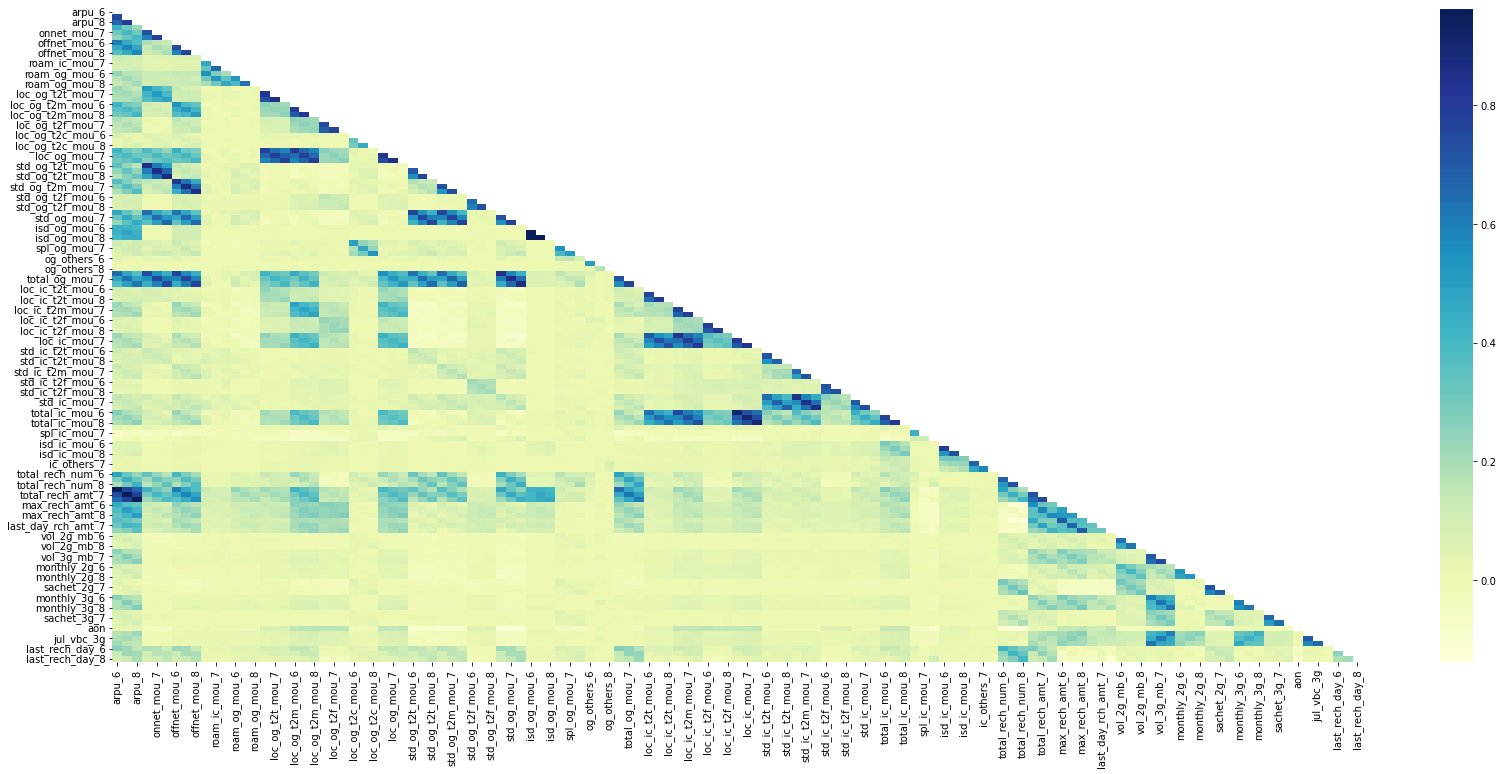

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28,12))
sns.heatmap(X_train.corr(),cmap="YlGnBu",annot=False,mask=np.triu(X_train.corr()))

In [55]:
### Identify columns having more than 90% correlation
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
high_corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]    
high_corr_cols

['isd_og_mou_7',
 'isd_og_mou_8',
 'total_ic_mou_6',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [56]:
X_train_scaled.drop(high_corr_cols,axis=1,inplace=True)
X_test_scaled.drop(high_corr_cols,axis=1,inplace=True)


In [57]:
# Stat Model Logistic regression model 2
logm1_2 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
display(logm1_2.fit().summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48877
Model Family:                Binomial   Df Model:                          121
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9165.1
Date:                Sun, 09 Oct 2022   Deviance:                       18330.
Time:                        09:57:18   Pearson chi2:                 7.61e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8259      0.051    -74.580      0.000      -3.926      -3.725
arpu_6                 0.1384      0.063      2.206      0.027       0.015       0.261
arpu_7                 0.0982      0.073      1.342      0.180      -0.045       0.242
arpu_8                 0.0530      0.058      0.909      0.363      -0.061       0.167
onnet_mou_6           -0.3254      1.685     -0.193      0.847      -3.629       2.978
onnet_mou_7           -1.1185      0.967     -1.157      0.247      -3.013       0.776
onnet_mou_8           -1.1670      1.253     -0.932      0.352      -3.623       1.288
offnet_mou_6          -0.2334      1.773     -0.132      0.895      -3.708       3.241
offnet_mou_7          -1.7325      0.959     -1.807      0.071      -3.611       0.146
offnet_mou_8          -1.5271      1.291     -1.183      0.237      -4.057       1.002
roam_ic_mou_6          0.0596      0.021      2.866      0.004       0.019       0.100
roam_ic_mou_7          0.0429      0.025      1.700      0.089      -0.007       0.092
roam_ic_mou_8         -0.0120      0.023     -0.528      0.597      -0.057       0.033
roam_og_mou_6          0.0719      0.432      0.166      0.868      -0.774       0.918
roam_og_mou_7          0.3325      0.186      1.784      0.074      -0.033       0.698
roam_og_mou_8          0.3743      0.276      1.355      0.175      -0.167       0.915
loc_og_t2t_mou_6     185.5399    575.932      0.322      0.747    -943.266    1314.346
loc_og_t2t_mou_7    1623.1992    614.480      2.642      0.008     418.841    2827.558
loc_og_t2t_mou_8    6171.3971    658.675      9.369      0.000    4880.417    7462.377
loc_og_t2m_mou_6     197.2470    612.698      0.322      0.748   -1003.619    1398.112
loc_og_t2m_mou_7    1580.6996    598.333      2.642      0.008     407.989    2753.410
loc_og_t2m_mou_8    6342.1655    676.869      9.370      0.000    5015.526    7668.805
loc_og_t2f_mou_6      15.7996     49.271      0.321      0.748     -80.769     112.368
loc_og_t2f_mou_7     133.4424     50.476      2.644      0.008      34.511     232.374
loc_og_t2f_mou_8     540.1659     57.647      9.370      0.000     427.180     653.152
loc_og_t2c_mou_6      -0.0524      0.028     -1.843      0.065      -0.108       0.003
loc_og_t2c_mou_7       0.0129      0.026      0.499      0.618      -0.038       0.064
loc_og_t2c_mou_8       0.0769      0.033      2.296      0.022       0.011       0.143
loc_og_mou_6        -345.7333    880.849     -0.392      0.695   -2072.166    1380.700
loc_og_mou_7       -2548.7114    965.024     -2.641      0.008   -4440.123    -657.300
loc_og_mou_8       -1.002e+04   1069.636     -9.369      0.000   -1.21e+04   -7925.505
std_og_t2t_mou_6   -2928.0220   1173.202     -2.496      0.013   -5227.455    -628.589
std_og_t2t_mou_7   -2340.9878   1311.9

### Feature Selection Using RFE

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)
rfe = rfe.fit(X_train_scaled,y_train)
# tuples of (feature name, whether selected, ranking)
rfe_res_list=list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

In [59]:
rfe_selected_cols=[]
for rfe_cols,sel,idx in rfe_res_list:
    if (sel):
        rfe_selected_cols.append(rfe_cols)
rfe_selected_cols    

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'aon']

In [60]:
# Stat Model Logistic regression model 3
X_train_rfe_sel = X_train_scaled[rfe_selected_cols]
X_test_rfe_sel = X_test_scaled[rfe_selected_cols]
logm1_3 = sm.GLM(y_train,(sm.add_constant(X_train_rfe_sel)), family = sm.families.Binomial())
logm1_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48968
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9725.5
Date:                Sun, 09 Oct 2022   Deviance:                       19451.
Time:                        09:58:19   Pearson chi2:                 1.60e+08
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9447      0.056    -70.556      0.000      -4.054      -3.835
onnet_mou_6            0.4150      0.066      6.317      0.000       0.286       0.544
onnet_mou_7            0.5797      0.089      6.535      0.000       0.406       0.754
onnet_mou_8            2.5969      1.225      2.120      0.034       0.196       4.998
offnet_mou_6           0.5358      0.069      7.814      0.000       0.401       0.670
offnet_mou_8           2.8998      1.286      2.255      0.024       0.379       5.420
roam_og_mou_8         -0.4974      0.272     -1.830      0.067      -1.030       0.035
loc_og_t2t_mou_8      -0.5799      0.120     -4.847      0.000      -0.814      -0.345
loc_og_t2m_mou_8      -0.4197      0.085     -4.949      0.000      -0.586      -0.253
std_og_t2t_mou_7      -0.3243      0.077     -4.208      0.000      -0.475      -0.173
og_others_8           -2.5159      1.763     -1.427      0.153      -5.971       0.939
total_og_mou_6        -0.4600      0.099     -4.669      0.000      -0.653      -0.267
total_og_mou_8        -4.7711      1.926     -2.477      0.013      -8.546      -0.996
loc_ic_t2t_mou_8       1.3773      0.372      3.699      0.000       0.648       2.107
loc_ic_t2m_mou_8       0.7879      0.431      1.829      0.067      -0.056       1.632
loc_ic_mou_7           1.6039      0.199      8.047      0.000       1.213       1.995
loc_ic_mou_8           2.4032      1.362      1.764      0.078      -0.267       5.073
std_ic_t2t_mou_8       0.5935      0.297      1.996      0.046       0.011       1.176
std_ic_t2m_mou_8       0.7857      0.436      1.802      0.072      -0.069       1.640
std_ic_mou_7           0.6020      0.090      6.689      0.000       0.426       0.778
std_ic_mou_8           1.1622      0.782      1.486      0.137      -0.371       2.695
total_ic_mou_7        -1.3152      0.234     -5.614      0.000      -1.774      -0.856
total_ic_mou_8        -7.2653      1.474     -4.928      0.000     -10.155      -4.376
spl_ic_mou_8          -0.9522      0.073    -13.035      0.000      -1.095      -0.809
isd_ic_mou_7           0.3372      0.059      5.694      0.000       0.221       0.453
isd_ic_mou_8           1.6331      0.325      5.024      0.000       0.996       2.270
last_day_rch_amt_8    -0.4483      0.036    -12.446      0.000      -0.519      -0.378
monthly_2g_8          -0.3956      0.040     -9.976      0.000      -0.473      -0.318
sachet_2g_8           -0.5378      0.047    -11.332      0.000      -0.631      -0.445
monthly_3g_8          -0.3826      0.039     -9.786      0.000      -0.459      -0.306
aon                   -0.2870      0.025    -11.661      0.000      -0.335      -0.239
======================================================================================
"""

In [61]:
# Run Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_sk_4 = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
log_sk_4.fit(X_train_rfe_sel, y_train)

LogisticRegression(C=1000000000.0)

### Make Predictions using above model

In [62]:
# Predicted probabilities
y_pred = log_sk_4.predict_proba(X_test_rfe_sel)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.290107
1,0.560242
2,0.251451
3,0.044894
4,0.147947


In [63]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [64]:

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Pred_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex(['ID','churn_probability','Churn_Pred_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final

,churn_probability,ID,Churn_Pred_Prob
0,1,3425,0.290107
1,1,33067,0.560242
2,0,52420,0.251451
3,0,5220,0.044894
4,1,33958,0.147947
...,...,...,...
20995,0,6664,0.104724
20996,0,60333,0.015077
20997,0,26916,0.032610
20998,0,31350,0.000963


In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Pred_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn_probability,ID,Churn_Pred_Prob,predicted
0,1,3425,0.290107,0
1,1,33067,0.560242,1
2,0,52420,0.251451,0
3,0,5220,0.044894,0
4,1,33958,0.147947,0


### Model Evaluation

In [66]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn_probability, y_pred_final.predicted )
confusion

array([[18647,   254],
       [ 1205,   894]], dtype=int64)

In [67]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted)

0.9305238095238095

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

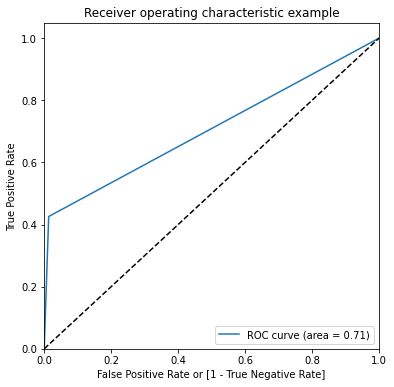

(array([0.        , 0.01343844, 1.        ]),
 array([0.       , 0.4259171, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [69]:
draw_roc(y_pred_final.churn_probability, y_pred_final.predicted)

In [70]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn_probability, y_pred_final.Churn_Pred_Prob))

'0.91'

In [158]:
act_test_df = pd.read_csv("test.csv")
act_test_df.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [159]:
#act_test_df_id['id']=pd.DataFrame(act_test_df['id'],index=act_test_df.index, columns=['id'])
act_test_df_id['id'] = (act_test_df['id']).to_frame()
act_test_df_id.head()

,id
0,69999
1,70000
2,70001
3,70002
4,70003


In [160]:
act_test_df.drop(droppable_cols,axis=1,inplace=True)
print('Dropped Columns count from input dataset=',len(droppable_cols),' New shape',act_test_df.shape)

Dropped Columns count from input dataset= 11  New shape (30000, 160)


In [161]:
### Drop the columns with more than 50% data missing
act_test_df.drop(df_missing_columns.index,axis=1,inplace=True)
print('Dropped Columns count from input dataset=',len(df_missing_columns.index),' New shape',act_test_df.shape)

Dropped Columns count from input dataset= 30  New shape (30000, 130)


In [162]:
### Convert the date fields into date type
for dt_col in dt_cols:
    act_test_df[dt_col]=pd.to_datetime(act_test_df[dt_col], format="%m/%d/%Y")


act_test_df['last_rech_day_6']=act_test_df.date_of_last_rech_6.dt.day
act_test_df['last_rech_day_7']=act_test_df.date_of_last_rech_7.dt.day
act_test_df['last_rech_day_8']=act_test_df.date_of_last_rech_8.dt.day

In [163]:
act_test_df.drop(drop_dt_cols,axis=1,inplace=True)
print('Dropped Columns count from input dataset=',len(drop_dt_cols),' New shape',act_test_df.shape)

Dropped Columns count from input dataset= 6  New shape (30000, 127)


In [164]:
for impute_col in impute_cols:
    act_test_df[impute_col] = act_test_df[impute_col].fillna(impute_dict[impute_col])
    

In [165]:
scaled_attrs = scaler.transform(act_test_df)
act_test_scaled = pd.DataFrame(scaled_attrs, index=act_test_df.index, columns=act_test_df.columns)

act_test_scaled.drop(high_corr_cols,axis=1,inplace=True)

In [166]:
act_test_rfe_sel = act_test_scaled[rfe_selected_cols]
y_act_test_pred = log_sk_4.predict_proba(act_test_rfe_sel)
y_act_test_pred_df = pd.DataFrame(y_act_test_pred)
y_act_test_pred_1 = y_act_test_pred_df.iloc[:,[1]]
y_act_test_pred_1= y_act_test_pred_1.rename(columns={ 1 : 'pred_probability'})
y_act_test_pred_1.head()

,churn_probability
0,0.011478
1,0.011816
2,0.244454
3,0.002227
4,0.055580


In [167]:
y_act_test_pred_1['churn_probability'] = y_act_test_pred_1.pred_probability.map( lambda x: 1 if x > 0.5 else 0)


In [168]:
y_act_test_pred_1.drop(['pred_probability'],axis=1,inplace=True)

In [169]:
type(act_test_df_id)

pandas.core.frame.DataFrame

In [170]:
y_act_test_pred_1_final = pd.concat([act_test_df_id,y_act_test_pred_1],axis=1)

y_act_test_pred_1_final = y_act_test_pred_1_final.set_index('id')
y_act_test_pred_1_final

,predicted
id,
69999,0
70000,0
70001,0
70002,0
70003,0
...,...
99994,0
99995,0
99996,0


In [171]:
y_act_test_pred_1_final.to_csv('Sujith_Predict1_Solution.csv')

## Perform PCA analysis on the data set

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(random_state=42)